# UNIVERSIDAD NACIONAL DE SAN ANTONIOABAD DEL CUSCO
# DEPARTAMENTO ACADÉMICO DE ING. INFORMÁTICA
##  DEEP LEARNING
## SEGUNDO EXAMEN PARCIAL 2023-1

## Nombre: Eliazra Noa Llasccanoa - Codigo 193003

## Ejercicio 1:
### ENUNCIADO:
1. Se necesita clasificar imágenes en escala de grises de 32 x 32 en una red neuronal 
convolucional con las siguientes capas:
▪ Una capa convolucional C1, con 64 filtros de 5x5 y sin zero padding.
▪ Una capa S1 de maxpooling, con 64 filtros de 2x2 y stride=2.
▪ Una capa convolucional C2, con 128 filtros de 5x5 y sin zero padding.
▪ Una capa S2 de maxpooling, con 128 filtros de 2x2 y stride=2.
▪ Una red completamente conectada con una capa de 256 neuronas (Dense1), otra de 
128 (Dense2), y la capa de salida con 10 neuronas de salida.
Determine el número de parámetros entrenables. (5 puntos)

**1.	Importe tensorflow.keras.datasets.cifar10 :**

In [1]:
from tensorflow.keras import datasets

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

**2.	Imprime la forma del conjunto de entrenamiento:**

In [2]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

**3.	Imprime la forma del conjunto de prueba:**

In [3]:
x_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

**4.	Funcion que convierte las imagenes a escala de grises :**

In [4]:
import numpy as np

def convertir_a_escala_grises(imagenes):
    imagenes_grises = np.dot(imagenes, [0.2989, 0.5870, 0.1140])
    imagenes_grises = np.expand_dims(imagenes_grises, axis=-1)
    return imagenes_grises


**5.	Convertir a escala de grises:**

In [5]:
x_train_grises = convertir_a_escala_grises(x_train)
x_test_grises = convertir_a_escala_grises(x_test)

**6.	visualizacion de las imagenes :**

Class:  [1]


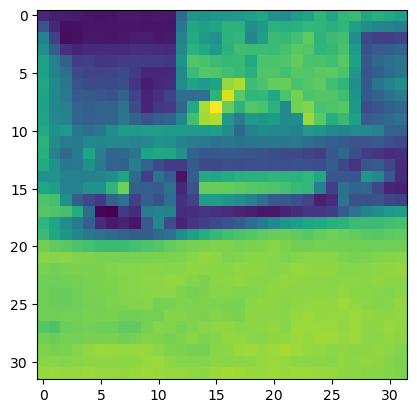

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train_grises[10000])
print("Class: ", y_train[10000])

**7.	Imprimir de nuevo la forma de entrenamiento y de prueba:**

In [7]:
x_train_grises.shape, y_train.shape

((50000, 32, 32, 1), (50000, 1))

In [8]:
x_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

Cifar10 classes:

0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck

In [9]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

**8.	Implementacion de la Red Neuronal**

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
# Capa convolucional C1
model.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 1)))

# Capa S1 de maxpooling
model.add(layers.MaxPooling2D((2, 2), strides=2))

# Capa convolucional C2
model.add(layers.Conv2D(128, (5, 5), activation='relu'))

# Capa S2 de maxpooling
model.add(layers.MaxPooling2D((2, 2), strides=2))

# Capa de aplanamiento
model.add(layers.Flatten())

# Capa completamente conectada Dense1
model.add(layers.Dense(256, activation='relu'))

# Capa completamente conectada Dense2
model.add(layers.Dense(128, activation='relu'))

# Capa de salida
model.add(layers.Dense(10, activation='softmax'))

# Imprimir el resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 256)               8

**8.	Determine el número de parámetros entrenables. (5 puntos)**

Capa de red  | Entrada    | Filtro      |Stride     |Produce    |Fórmula  |   Parámetros
:---         | :---:      | :---:        | :---:      | :---:     | ---:     | ---:      |   
Input   | 32x32x1  |      |      | 28x28x1 | |0
Conv2d|28x28x1|  5x5x64  |  1   | 28x28x64 | 5x5x1x64+64| 1664
maxpooling|28x28x64|2x2x64|2|14x14x64| |0
Conv2d|14x14x64|5x5x128|1|10x10x128|5x5x128x128+128|409728
maxpooling|11x10x64|2x2x128|2|2x2x128| | 0
flatten|5x5x128| | |3200| |0
dense|3200| | | 256|3200*256+256|819456
dense1|256| | | 128|256*128+128|32896
dense2|128| | | 10|128*10+10|1290

TOTAL | | | | | | 1,060,234


## Ejercciio 2

### Enunciado

2. Diseñar una red neuronal convolucional (NO PREENTRENADA) y entrenarla para realizar 
clasificación con el conjunto de datos de aves que se adjunta
Se evaluará de la siguiente manera:
a) Lectura y preprocesamiento de datos (2 ptos.)
b) Construcción del modelo (3 ptos.)
c) Entrenamiento del modelo (2 ptos.)
d) Evaluación de la accuracy con datos de test o validación que se calificará de la 
siguiente manera:
 accuracy >= 85% (5 puntos)
 85 % > accuracy >= 60% (3 puntos)
 Accuracy < 60% (1 punto) 
e) Predicciones con el modelo entrenado (3 ptos.)
NOTA: No usar redes pre entrenada

In [12]:
# Import Data Science Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Tensorflow Libraries
from tensorflow import keras
from keras.layers import Dense, Dropout

# System libraries
from pathlib import Path
import os.path
import random

# Visualization Libraries
import matplotlib.cm as cm
import seaborn as sns

sns.set_style('darkgrid')

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools

## a) LECTURA Y PREPROCESAMIENTO DE DATOS 

In [25]:
import os
import cv2
from pathlib import Path

data_dir = "./aves/"  # Reemplaza con la ruta de tu carpeta principal de aves

test_image_paths = []  # Lista para almacenar las rutas de las imágenes de la carpeta "test"
train_image_paths = []  # Lista para almacenar las rutas de las imágenes de la carpeta "train"
valid_image_paths = []  # Lista para almacenar las rutas de las imágenes de la carpeta "valid"

test_labels = []  # Lista para almacenar las etiquetas de las imágenes de la carpeta "test"
train_labels = []  # Lista para almacenar las etiquetas de las imágenes de la carpeta "train"
valid_labels = []  # Lista para almacenar las etiquetas de las imágenes de la carpeta "valid"

# Recorrer las subcarpetas dentro de la carpeta principal
for split_folder in ["test", "train", "valid"]:
    split_dir = os.path.join(data_dir, split_folder)
    for root, dirs, files in os.walk(split_dir):
        for file_name in files:
            if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_path = os.path.join(root, file_name)
                label = os.path.basename(os.path.dirname(image_path))
                
                if split_folder == "test":
                    test_image_paths.append(image_path)
                    test_labels.append(label)
                elif split_folder == "train":
                    train_image_paths.append(image_path)
                    train_labels.append(label)
                elif split_folder == "valid":
                    valid_image_paths.append(image_path)
                    valid_labels.append(label)

# Imprimir el total de imágenes leídas
print(f"Se leyeron {len(test_image_paths)} imágenes de la carpeta 'test'.")
print(f"Se leyeron {len(train_image_paths)} imágenes de la carpeta 'train'.")
print(f"Se leyeron {len(valid_image_paths)} imágenes de la carpeta 'valid'.")

# Ahora puedes utilizar las listas de imágenes y etiquetas correspondientes para cada carpeta en tu procesamiento adicional.


Se leyeron 50 imágenes de la carpeta 'test'.
Se leyeron 1490 imágenes de la carpeta 'train'.
Se leyeron 50 imágenes de la carpeta 'valid'.


PREPROCESAMEINTO

In [31]:
x_test[0]

'./aves/test\\AFRICAN FIREFINCH\\1.jpg'

In [32]:
# Convertir la lista de imágenes preprocesadas en un arreglo NumPy
x_test = np.array(test_image_paths)
x_train = np.array(train_image_paths)
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [35]:
# Imprimir las formas de los arreglos
print("Forma de x_test:", x_test.shape)
print("Forma de x_train:", x_train.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de x_test: (50,)
Forma de x_train: (1490,)
Forma de y_train: (1490,)
Forma de y_test: (50,)


## PREPROCESAMEINTO

In [36]:
import cv2
import numpy as np

def preprocess_images(image_paths):
    preprocessed_images = []
    for image_path in image_paths:
        # Leer la imagen utilizando OpenCV
        image = cv2.imread(image_path)
        
        # Aplicar el preprocesamiento necesario a la imagen
        # Por ejemplo, puedes realizar el cambio de tamaño, normalización, ajuste de contraste, etc.
        # Aquí se muestra un ejemplo de cambio de tamaño a un tamaño objetivo de (32, 32)
        resized_image = cv2.resize(image, (32, 32))
        
        # Puedes agregar más pasos de preprocesamiento según tus necesidades
        
        # Agregar la imagen preprocesada a la lista de imágenes preprocesadas
        preprocessed_images.append(resized_image)
    
    return preprocessed_images

# Aplicar el preprocesamiento a las imágenes de x_test y x_train
preprocessed_x_test = preprocess_images(x_test)
preprocessed_x_train = preprocess_images(x_train)

# Convertir las listas de imágenes preprocesadas en arreglos NumPy
x_test_preprocessed = np.array(preprocessed_x_test)
x_train_preprocessed = np.array(preprocessed_x_train)

# Imprimir las formas de los arreglos preprocesados
print("Forma de x_test_preprocessed:", x_test_preprocessed.shape)
print("Forma de x_train_preprocessed:", x_train_preprocessed.shape)


Forma de x_test_preprocessed: (50, 32, 32, 3)
Forma de x_train_preprocessed: (1490, 32, 32, 3)


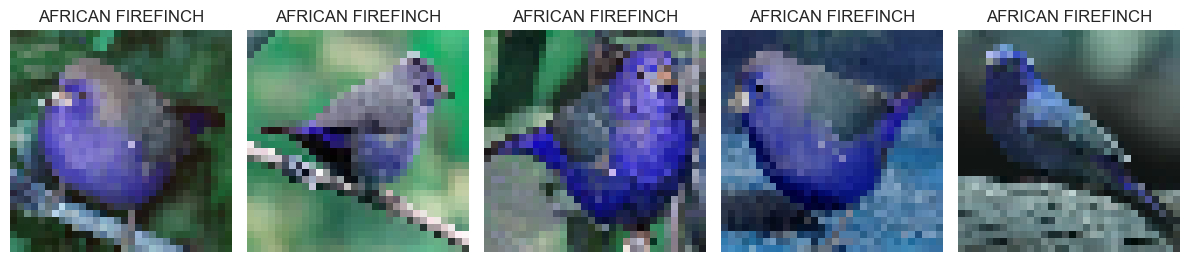

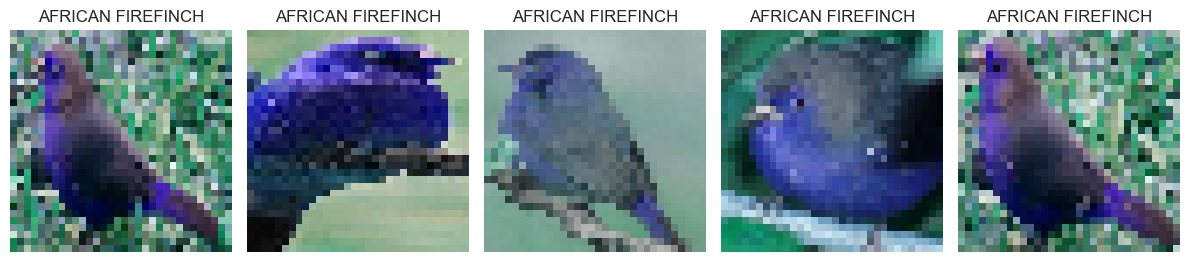

In [37]:
import matplotlib.pyplot as plt

# Función para visualizar las imágenes
def show_images(images, labels):
    num_images = len(images)
    fig, axes = plt.subplots(1, num_images, figsize=(12, 12))
    
    for i in range(num_images):
        axes[i].imshow(images[i])
        axes[i].axis('off')
        axes[i].set_title(labels[i])
    
    plt.tight_layout()
    plt.show()

# Visualizar algunas imágenes preprocesadas de x_test_preprocessed
sample_images_test = x_test_preprocessed[:5]
sample_labels_test = y_test[:5]

show_images(sample_images_test, sample_labels_test)

# Visualizar algunas imágenes preprocesadas de x_train_preprocessed
sample_images_train = x_train_preprocessed[:5]
sample_labels_train = y_train[:5]

show_images(sample_images_train, sample_labels_train)

#### CODIFICACION DE LAS ETIQUETAS CON LABEL ENCODER

In [44]:
from sklearn.preprocessing import LabelEncoder

# Codificar las etiquetas como valores numéricos
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


## b) Construcción del modelo (3 ptos.)


In [38]:
import tensorflow as tf

model = tf.keras.Sequential([
    # First Conv-ReLU-Conv-ReLU-MaxPool Layer
    tf.keras.layers.Conv2D(input_shape=[32, 32, 3],
                           filters=32,
                           kernel_size=3,
                           padding='SAME',
                           activation="relu",
                           kernel_initializer='he_uniform',
                           name="C1"),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           padding='SAME',
                           activation="relu",
                           kernel_initializer='he_uniform',
                           name="C2"),
    tf.keras.layers.MaxPool2D((2, 2),
                              name="P1"),
    tf.keras.layers.Dropout(0.2),
    # Second Conv-ReLU-Conv-ReLU-MaxPool Layer
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=3,
                           padding='SAME',
                           activation="relu",
                           kernel_initializer='he_uniform',
                           name="C3"),
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=3,
                           padding='SAME',
                           activation="relu",
                           kernel_initializer='he_uniform',
                           name="C4"),
    tf.keras.layers.MaxPool2D((2, 2),
                              name="P2"),
    tf.keras.layers.Dropout(0.2),
    # Third Conv-ReLU-Conv-ReLU-MaxPool Layer
    tf.keras.layers.Conv2D(filters=128,
                           kernel_size=3,
                           padding='SAME',
                           activation="relu",
                           kernel_initializer='he_uniform',
                           name="C5"),
    tf.keras.layers.Conv2D(filters=128,
                           kernel_size=3,
                           padding='SAME',
                           activation="relu",
                           kernel_initializer='he_uniform',
                           name="C6"),
    tf.keras.layers.MaxPool2D((2, 2),
                              name="P3"),
    tf.keras.layers.Dropout(0.2),
    # Flatten Layer
    tf.keras.layers.Flatten(name="FLATTEN"),
    # Fully Connected Layer
    tf.keras.layers.Dense(units=128,
                          activation="relu",
                          name="D1"),
    tf.keras.layers.Dropout(0.2),
    # Final Fully Connected Layer
    tf.keras.layers.Dense(units=10,
                          activation="softmax",
                          name="OUTPUT")
])



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 C1 (Conv2D)                 (None, 32, 32, 32)        896       
                                                                 
 C2 (Conv2D)                 (None, 32, 32, 32)        9248      
                                                                 
 P1 (MaxPooling2D)           (None, 16, 16, 32)        0         
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 C3 (Conv2D)                 (None, 16, 16, 64)        18496     
                                                                 
 C4 (Conv2D)                 (None, 16, 16, 64)        36928     
                                                                 
 P2 (MaxPooling2D)           (None, 8, 8, 64)         

In [39]:

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 C1 (Conv2D)                 (None, 32, 32, 32)        896       
                                                                 
 C2 (Conv2D)                 (None, 32, 32, 32)        9248      
                                                                 
 P1 (MaxPooling2D)           (None, 16, 16, 32)        0         
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 C3 (Conv2D)                 (None, 16, 16, 64)        18496     
                                                                 
 C4 (Conv2D)                 (None, 16, 16, 64)        36928     
                                                                 
 P2 (MaxPooling2D)           (None, 8, 8, 64)         

## c) Entrenamiento del modelo (2 ptos.)


In [50]:
# Definir los datos de entrenamiento y prueba
x_train_processed = x_train_preprocessed
x_test_processed = x_test_preprocessed

# Entrenar el modelo
epochs = 40
history = model.fit(x_train_processed, y_train_encoded, validation_data=(x_test_processed, y_test_encoded), epochs=epochs)


Epoch 1/40


47/47 [==============================] - 9s 190ms/step - loss: 1.3432 - accuracy: 0.5309 - val_loss: 1.0017 - val_accuracy: 0.6600
Epoch 2/40
47/47 [==============================] - 9s 196ms/step - loss: 1.2571 - accuracy: 0.5604 - val_loss: 1.1243 - val_accuracy: 0.6600
Epoch 3/40
47/47 [==============================] - 9s 187ms/step - loss: 1.2228 - accuracy: 0.5664 - val_loss: 1.0046 - val_accuracy: 0.6600
Epoch 4/40
47/47 [==============================] - 9s 183ms/step - loss: 1.1732 - accuracy: 0.6013 - val_loss: 0.9522 - val_accuracy: 0.6800
Epoch 5/40
47/47 [==============================] - 9s 199ms/step - loss: 1.1204 - accuracy: 0.6101 - val_loss: 0.9062 - val_accuracy: 0.6800
Epoch 6/40
47/47 [==============================] - 10s 223ms/step - loss: 1.1419 - accuracy: 0.5953 - val_loss: 0.8994 - val_accuracy: 0.6200
Epoch 7/40
47/47 [==============================] - 11s 221ms/step - loss: 1.0186 - accuracy: 0.6389 - val_loss: 0.8812 - val_accuracy: 0.6200
Epoch 8/40
47/4

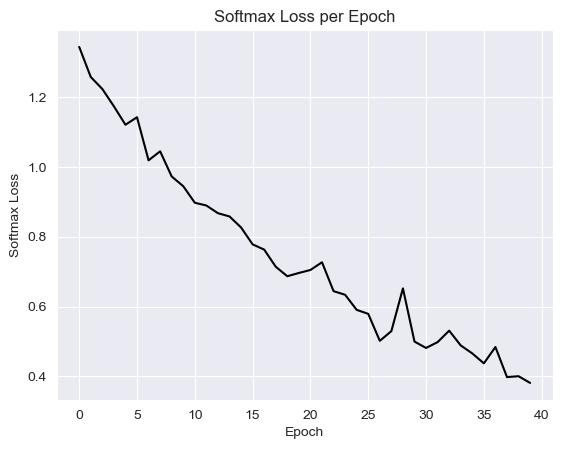

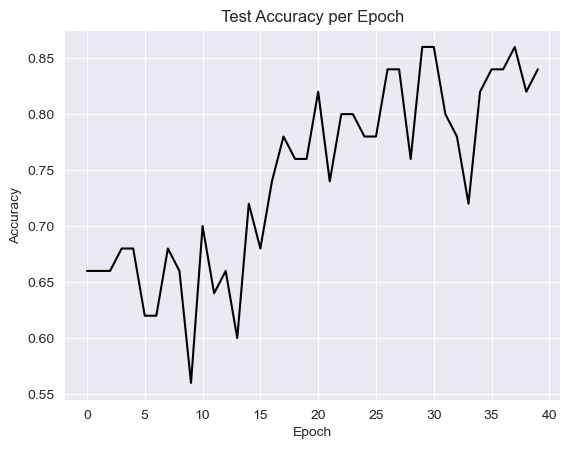

In [51]:
# Print loss and accuracy
# Matlotlib code to plot the loss and accuracy
epochs_indices = range(0, epochs, 1)

# Plot loss over time
plt.plot(epochs_indices, history.history["loss"], 'k-')
plt.title('Softmax Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Softmax Loss')
plt.show()

# Plot accuracy over time
plt.plot(epochs_indices, history.history["val_accuracy"], 'k-')
plt.title('Test Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

## e) Predicciones con el modelo entrenado (3 ptos.)


In [53]:
import numpy as np

# Supongamos que tienes el modelo entrenado y el conjunto de prueba x_test_processed

# Seleccionar tres imágenes aleatorias del conjunto de prueba
random_indices = np.random.choice(len(x_test_processed), size=3, replace=False)
sample_images = x_test_processed[random_indices]

# Realizar predicciones en las imágenes seleccionadas
predictions = model.predict(sample_images)

# Obtener las clases predichas para cada imagen
predicted_classes = np.argmax(predictions, axis=1)

# Obtener las etiquetas reales para cada imagen
true_labels = y_test_encoded[random_indices]

# Imprimir las predicciones y las etiquetas reales
for i in range(len(sample_images)):
    print("Imagen", i+1)
    print("Predicción:", predicted_classes[i])
    print("Etiqueta real:", true_labels[i])
    print()


1/1 [==============================] - 0s 77ms/step
Imagen 1
Predicción: 8
Etiqueta real: 8

Imagen 2
Predicción: 6
Etiqueta real: 6

Imagen 3
Predicción: 0
Etiqueta real: 0



Las predicciones son correctas